In [2]:
""" Neural Network.
A 2-Hidden Layers Fully Connected Neural Network (a.k.a Multilayer Perceptron)
implementation with TensorFlow. This example is using the MNIST database
of handwritten digits (http://yann.lecun.com/exdb/mnist/).
Links:
    [MNIST Dataset](http://yann.lecun.com/exdb/mnist/).
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""
 
from __future__ import print_function

from keras import backend as k
k.clear_session()

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/home/tf/tf/data/", one_hot=True)
 
import tensorflow as tf
 
# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100
model_path = "/home/tf/tf/model/model.ckpt"
 
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
 
# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])
 
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}
 
 
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
 
# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)
 
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
 
# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
 
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
 
# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()
 
# Start training
with tf.Session() as sess:
 
    # Run the initializer
    sess.run(init)
 
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                  Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
 
    print("Optimization Finished!")
 
    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)
 
# Running a test dataset by loading the model saved earlier
with tf.Session() as sess:
  
    # Run the initializer
    sess.run(init)
 
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % save_path)
     
    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

Extracting /home/tf/tf/data/train-images-idx3-ubyte.gz
Extracting /home/tf/tf/data/train-labels-idx1-ubyte.gz
Extracting /home/tf/tf/data/t10k-images-idx3-ubyte.gz
Extracting /home/tf/tf/data/t10k-labels-idx1-ubyte.gz
Step 1, Minibatch Loss= 9623.2227, Training Accuracy= 0.344
Step 100, Minibatch Loss= 176.4309, Training Accuracy= 0.898
Step 200, Minibatch Loss= 221.5601, Training Accuracy= 0.852
Step 300, Minibatch Loss= 50.6982, Training Accuracy= 0.883
Step 400, Minibatch Loss= 65.8929, Training Accuracy= 0.805
Step 500, Minibatch Loss= 52.1152, Training Accuracy= 0.844
Optimization Finished!
Model saved in file: /home/tf/tf/model/model.ckpt
INFO:tensorflow:Restoring parameters from /home/tf/tf/model/model.ckpt
Model restored from file: /home/tf/tf/model/model.ckpt
Testing Accuracy: 0.8712


In [3]:
from __future__ import print_function
 
from keras import backend as k
k.clear_session()

import tensorflow as tf
 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/home/tf/tf/data/", one_hot=True)
 
# Parameters
model_path = "/home/tf/tf/model/model.ckpt"
 
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
 
# tf Graph input
X = tf.placeholder("float", [None, num_input])
 
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}
 
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
 
# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)
 
# Evaluate model
# argmax returns the index with the largest value across axes of a tensor
ans = tf.argmax(prediction, 1)
 
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
 
# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()
 
# Running a test dataset by loading the model saved earlier
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
 
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % model_path)
 
    # Calculate accuracy for MNIST test images
    print("Answer:", sess.run(ans, feed_dict={X: mnist.test.images}))

Extracting /home/tf/tf/data/train-images-idx3-ubyte.gz
Extracting /home/tf/tf/data/train-labels-idx1-ubyte.gz
Extracting /home/tf/tf/data/t10k-images-idx3-ubyte.gz
Extracting /home/tf/tf/data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from /home/tf/tf/model/model.ckpt
Model restored from file: /home/tf/tf/model/model.ckpt
Answer: [7 2 1 ... 4 5 6]


Extracting /home/tf/tf/data/train-images-idx3-ubyte.gz
Extracting /home/tf/tf/data/train-labels-idx1-ubyte.gz
Extracting /home/tf/tf/data/t10k-images-idx3-ubyte.gz
Extracting /home/tf/tf/data/t10k-labels-idx1-ubyte.gz


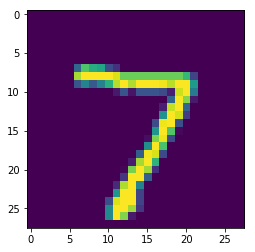

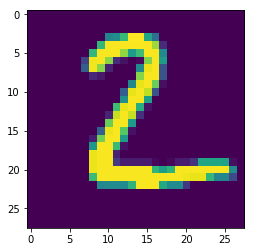

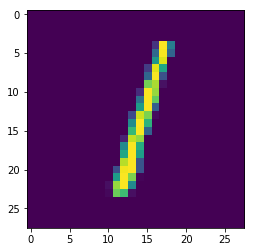

INFO:tensorflow:Restoring parameters from /home/tf/tf/model/model.ckpt
Model restored from file: /home/tf/tf/model/model.ckpt
Answer: [7 2 1]


In [11]:
from __future__ import print_function

from keras import backend as k
k.clear_session()

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/home/tf/tf/data/", one_hot=True)

# Parameters
model_path = "/home/tf/tf/model/model.ckpt"
 
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
 
# tf Graph input
X = tf.placeholder("float", [None, num_input])
 
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}
 
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
 
# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)
 
# Evaluate model
# argmax returns the index with the largest value across axes of a tensor
ans = tf.argmax(prediction, 1)
 
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
 
# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()
 
# Show image that we want to predict
for i in range(3) :
    plt.imshow(mnist.test.images[i].reshape((28, 28)))
    plt.show()

# Running a test dataset by loading the model saved earlier
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
 
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % model_path)
 
    # Calculate the answer for the image
    print("Answer:", sess.run(ans, feed_dict={X: mnist.test.images[0:3]}))

In [12]:
from keras import backend as k
k.clear_session()
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("", one_hot=True)

import tensorflow as tf

sess = tf.InteractiveSession()


x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))


sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()  # defaults to saving all variables

sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))

  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
# 儲存模型引數，注意把這裡改為自己的路徑
saver.save(sess, '/home/tf/tf/model1/model.ckpt')

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

print("Finish!")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_Labels_Images/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_Labels_Images/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_Labels_Images/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_Labels_Images/t10k-labels-idx1-ubyte.gz
0.9172
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
step 0, training accuracy 0.08
step 100, training accuracy 0.88
step 200, training accuracy 0.88
step 300, training accuracy 0.84
step 400, training accuracy 0.88
step 500, training accuracy 0.9
step 600, training accuracy 0.94
step 700, training accuracy 0.98
step 800, training accuracy 0.9
step 900, training accuracy 1
step 1000, training accuracy 0.88
step 1100, training accuracy 0.94


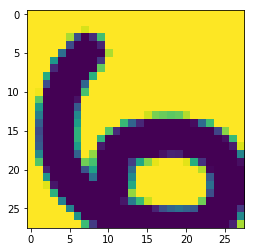

INFO:tensorflow:Restoring parameters from /home/tf/tf/model1/model.ckpt
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
recognize result:
6


In [9]:
from keras import backend as k
k.clear_session()
from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt
#import cv2

def imageprepare():
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    file_name='/home/tf/tf/test-data/6.png'# 匯入自己的圖片地址
    #in terminal 'mogrify -format png *.jpg' convert jpg to png
    im = Image.open(file_name).convert('L')

    im.save("Pictures/sample.png")
    plt.imshow(im)
    plt.show()
    tv = list(im.getdata()) #get pixel values

    #normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [ (255-x)*1.0/255.0 for x in tv]
    #print(tva)
    return tva

    """
    This function returns the predicted integer.
    The imput is the pixel values from the imageprepare() function.
    """

    # Define the model (same as when creating the model file)
result=imageprepare()
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

init_op = tf.initialize_all_variables()


"""
Load the model2.ckpt file
file is stored in the same directory as this python script is started
Use the model to predict the integer. Integer is returend as list.

Based on the documentatoin at
https://www.tensorflow.org/versions/master/how_tos/variables/index.html
"""
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init_op)
    saver.restore(sess, "/home/tf/tf/model1/model.ckpt")#這裡使用了之前儲存的模型引數
    #print ("Model restored.")

    prediction=tf.argmax(y_conv,1)
    predint=prediction.eval(feed_dict={x: [result],keep_prob: 1.0}, session=sess)
    print(h_conv2)

    print('recognize result:')
    print(predint[0])